# Python Final
Jeremy Short

Import Required Modules

In [160]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

### 1. Predict Market Value Using Linear Regression

In [3]:
# Read the GlenCove.xlsx file into a Data frame
glencove = pd.read_excel('GlenCove.xlsx')

In [6]:
# Print the first 10 rows to get a feel for the data
glencove.head(10)

,Address,Fair Market Value($000),Property Size (acres),Age,House Size (square feet),Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,56,2448,7,3.5,2
1,21 Jefferson St,425.0,0.2192,61,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,39,2073,5,3.0,2
3,4 Poppy Lane,628.2,0.4608,28,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,56,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,98,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,58,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,17,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,62,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,25,3202,8,2.5,2


In [31]:
# Rename columns that have problematic names
glencove.rename(columns ={'Fair Market Value($000)':'market_value',
                          'Property Size (acres)':'property_size', 
                          'House Size (square feet)':'house_size'}, inplace = True)

In [32]:
# Remove the age column in the new data frame
glencove1 = glencove.drop(columns =['Age'])

# Equation to replace the garage value with 1 and 0
f = lambda x: 0 if x<1 else 1

# Using the above equation to replace the garage values
glencove1['Garage']= glencove1['Garage'].map(f)

In [33]:
# View summary statistics for the new data set
print(glencove1.describe())

       market_value  property_size   house_size      Rooms      Baths  \
count     30.000000      30.000000    30.000000  30.000000  30.000000   
mean     474.910000       0.275960  1978.833333   6.833333   2.000000   
std      144.312669       0.236445   550.875234   1.487496   0.694808   
min      310.200000       0.085200  1008.000000   5.000000   1.000000   
25%      374.675000       0.152650  1622.250000   6.000000   1.625000   
50%      431.200000       0.204050  1992.000000   7.000000   2.000000   
75%      535.125000       0.270350  2205.500000   7.750000   2.500000   
max      889.000000       1.310000  3202.000000  11.000000   3.500000   

          Garage  
count  30.000000  
mean    0.566667  
std     0.504007  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     1.000000  


In [38]:
# Create a correlation matrix from the selected variables
print(glencove1[['property_size','house_size','Rooms','Baths']].corr())

               property_size  house_size     Rooms     Baths
property_size       1.000000    0.211664  0.052963  0.053408
house_size          0.211664    1.000000  0.399573  0.521314
Rooms               0.052963    0.399573  1.000000  0.133457
Baths               0.053408    0.521314  0.133457  1.000000


Property_Size has a weak positive (sloping up and to the right) correlation with house_size and nearly no correlation or a very weak positive (sloping up and to the right) with Rooms and Baths.

House_size has a weak positive (sloping up and to the right) correlation with property_size and rooms while it has a moderate positive (sloping up and to the right) correlation with Baths.

Rooms has a weak positive (sloping up and to the right) or no correlation with property_size and Baths, and a weak positive (sloping up and to the right)correlation with house_size. 

Baths has a weak positive (sloping up and to the right)correlation with property_size and Rooms, and a moderate positive (sloping up and to the right) correlation with house_size.


In [39]:
# Fit the data set to a linear regression model using market_value as the target variable and 
# all other variables as predictors variables.
model = ols('market_value ~ property_size + house_size + Rooms + Baths + Garage', glencove1).fit()

In [40]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     21.09
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           4.52e-08
Time:                        12:44:00   Log-Likelihood:                -165.94
No. Observations:                  30   AIC:                             343.9
Df Residuals:                      24   BIC:                             352.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        78.0523     67.779      1.152

In [41]:
#Create Anova table
anova1 = sm.stats.anova_lm(model, typ=2)

In [42]:
#Print Anova table
print(anova1)

                      sum_sq    df          F    PR(>F)
property_size  185956.980096   1.0  39.850226  0.000002
house_size      45335.829171   1.0   9.715382  0.004693
Rooms              27.229339   1.0   0.005835  0.939743
Baths           13203.326340   1.0   2.829448  0.105518
Garage           3736.437085   1.0   0.800711  0.379768
Residual       111993.529961  24.0        NaN       NaN


Model Interpretation

I think that this is a good model since it has a decently high adjusted R2 score at 0.776 meaning that 77.6% of the variance can be explained by the model. I also think that this is a good model sinc the AIC and BAC scores are relatively low and lower values are more desireable for these measures.

Linear Regression Equation

Y = 78.0523 + 359.3104(property_size) + 0.1025(house_size) + 0.7385(Rooms) + 36.8445(Baths) + 28.3802(Garage)

In [44]:
# Predict the fiar market value of a house that is 2000 sqft, on 0.30 acres, with 6 rooms, 2 bathrooms, and a garage.
model.predict({'property_size':0.30,'house_size':2000,'Rooms':6, 'Baths':2,'Garage':1})

0    497.40068
dtype: float64

### 3. Distribution of Values of NBA Franchises 

In [67]:
# Import the baseball_values.xlsx file into a data frame
NBAv = pd.read_excel('NBAValues.xlsx')

# Show the entire data frame
NBAv

,Team Name,Team Code,Revenue ($mil),Current Value ($mil)
0,Atlanta Hawks,ATL,133,825
1,Boston Celtics,BOS,173,1700
2,Brooklyn Nets,BKN,212,1500
3,Charlotte Bobcats,CHA,130,725
4,Chicago Bulls,CHI,201,2000
5,Cleveland Cavaliers,CLE,149,915
6,Dallas Mavericks,DAL,168,1150
7,Denver Nuggets,DEN,136,855
8,Detroit Pistons,DET,144,810
9,Golden State Warriors,GSW,168,1300


In [ ]:
# Creating Histograms

Text(0, 0.5, 'Frequency')

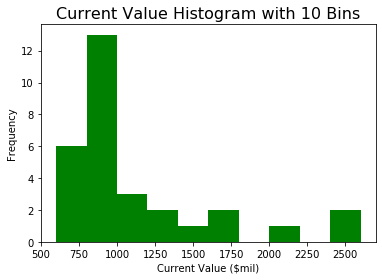

In [63]:
plt.hist(NBAv['Current Value ($mil) '], bins=10, color ='g')
plt.title('Current Value Histogram with 10 Bins', fontsize = 16)
plt.xlabel('Current Value ($mil)', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

Text(0, 0.5, 'Frequency')

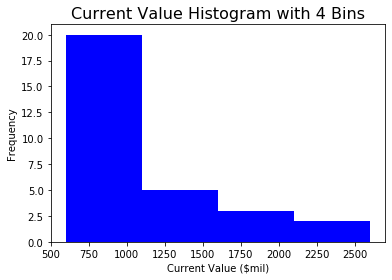

In [64]:
plt.hist(NBAv['Current Value ($mil) '], bins=4, color ='b')
plt.title('Current Value Histogram with 4 Bins', fontsize = 16)
plt.xlabel('Current Value ($mil)', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

Text(0, 0.5, 'Frequency')

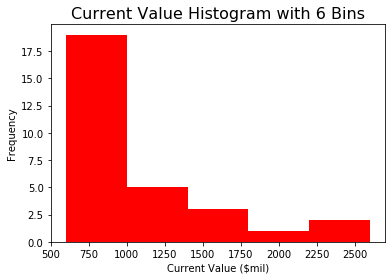

In [68]:
plt.hist(NBAv['Current Value ($mil) '], bins=5, color ='r')
plt.title('Current Value Histogram with 5 Bins', fontsize = 16)
plt.xlabel('Current Value ($mil)', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

Text(0, 0.5, 'Frequency')

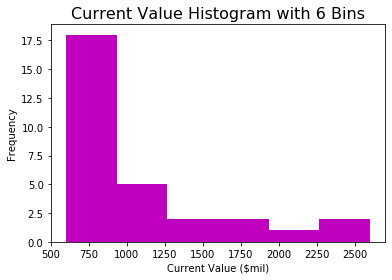

In [70]:
plt.hist(NBAv['Current Value ($mil) '], bins=6, color ='m')
plt.title('Current Value Histogram with 6 Bins', fontsize = 16)
plt.xlabel('Current Value ($mil)', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

Best number of Bins

I think that the best number of bins for this data set is 6 since it displays the data wiht no breaks and does a good
job of showing the general shape of the distribution. It also meets the standard rule of taking the square root of the number of obeservations and using that number of bins, at 30 observations the optimal number of bins would be between
5 and 6.

Description of the shape

The data is right skewed, meaning that there is a longer tail to the right of the data set with the highest frenquency of obersrvations occuring on the the left.

### Distribution of Values of MLB Teams

In [75]:
#Read the baseball_values.csv file into a dataframe
baseball = pd.read_csv('baseball_values.csv')
baseball

,Team,Revenue,Value
0,Baltimore,245,1000
1,Boston,370,2100
2,Chicago White Sox,227,975
3,Cleveland,207,825
4,Detroit,254,1125
5,Houston,175,800
6,Kansas City,231,700
7,Los Angeles Angels,304,1300
8,Minnesota,223,895
9,New York Yankees,508,3200


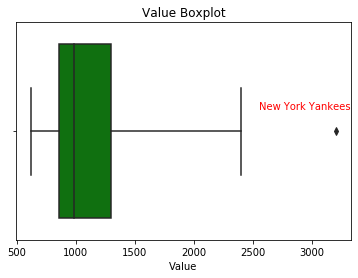

In [101]:
sns.boxplot(baseball.Value, color = 'g', whis = 3)
plt.xlabel('Value ($mil)')
plt.title('Value Boxplot')
plt.annotate('New York Yankees',xy =(3000,.3), xytext=(2550,-.1), color = 'r')
plt.show()

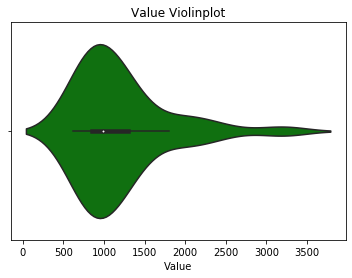

In [104]:
# Create a Violin Plot
sns.violinplot(baseball.Value, color = 'g', whis = 3)
plt.xlabel('Value ($mil)')
plt.title('Value Violin Plot')
plt.show()

The approximate mode of the data set is 1000.

### Use K-NN to classify the type of fruit

In [107]:
# Load the fruit dataset
fruit = pd.read_csv('fruit.tsv', sep = '\t')


In [108]:
# Show the first 5 rows
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [113]:
fruit.groupby(fruit['fruit_name']).count()

,fruit_label,fruit_subtype,mass,width,height,color_score
fruit_name,,,,,,
apple,19,19,19,19,19,19
lemon,16,16,16,16,16,16
mandarin,5,5,5,5,5,5
orange,19,19,19,19,19,19


In [115]:
fruit1 = fruit[['fruit_name','mass','width','height','color_score']]

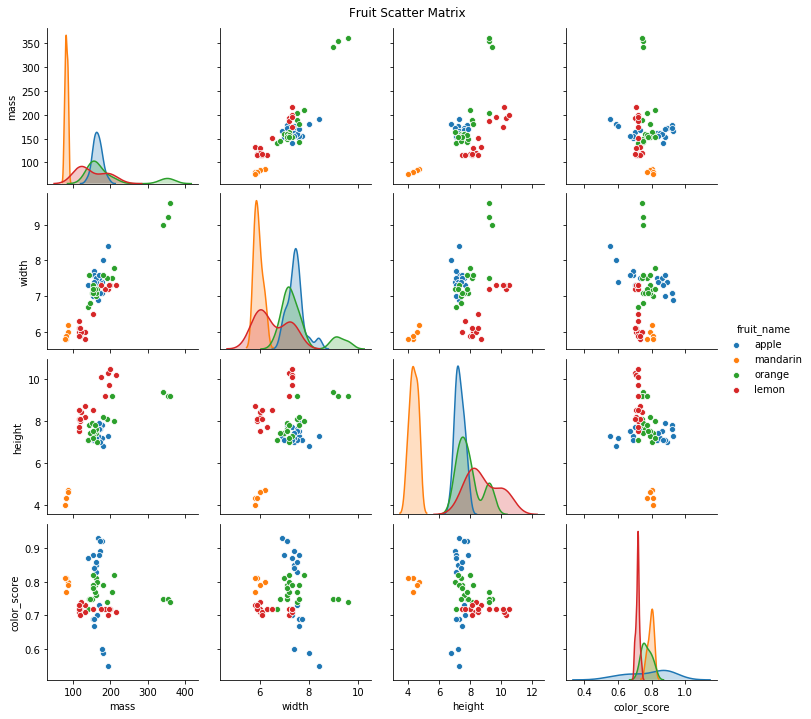

In [148]:
sns.pairplot(fruit1, hue='fruit_name')
plt.subplots_adjust(top=0.95)
plt.suptitle('Fruit Scatter Matrix')
plt.show()

I do not think that mass or height would be a good predictor of fruit_name since the data seems to have a large amount of overlap between the various fruit names.

In [155]:
#Assign Fruit_name as dependent variable and all other as independent variables
x = fruit1[['mass','width', 'height','color_score']]
y = fruit['fruit_name']

In [156]:
#Split the data in training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [157]:
#Print summary statistics for train and test independent variables
print(x_train.describe())
print(x_test.describe())

             mass      width     height  color_score
count   41.000000  41.000000  41.000000    41.000000
mean   160.878049   7.058537   7.682927     0.758049
std     53.607926   0.842608   1.236710     0.076034
min     80.000000   5.800000   4.300000     0.550000
25%    130.000000   6.200000   7.300000     0.720000
50%    158.000000   7.200000   7.600000     0.750000
75%    172.000000   7.500000   8.200000     0.810000
max    356.000000   9.200000  10.500000     0.920000
             mass      width     height  color_score
count   18.000000  18.000000  18.000000    18.000000
mean   168.222222   7.211111   7.716667     0.773889
std     59.380682   0.767646   1.649331     0.079789
min     76.000000   5.800000   4.000000     0.600000
25%    144.000000   7.100000   7.200000     0.725000
50%    162.000000   7.200000   7.550000     0.765000
75%    179.000000   7.375000   8.175000     0.805000
max    362.000000   9.600000  10.300000     0.930000


In [161]:
#Build and train the K-NN model wiht 5NN
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) 

In [162]:
#Print confusion Matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[3 1 0 0]
 [1 2 0 0]
 [0 0 2 0]
 [4 3 0 2]]


In [166]:
# Print model accuracy rate
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.5
